# Classification of Fruit Using Convolutional Neural Networks

### By Benjamin Frost and Sophie Chalklin

#### Introduction to AI 2020/21

In [1]:
# for i in range(2):
#     print("Attempt " + str(i+1))
#     try:
#         import os
#         import cv2
#         import numpy as np
#         import sklearn as sk
#         import tqdm
#         import matplotlib.pyplot as plt
#         print("Library imports successful")
#         break
#     except:
#         print("Attempting library installs")
#         !pip install opencv-python
#         !pip install numpy
#         !pip install sklearn

import os
import cv2
import numpy as np
import sklearn as sk
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tensorflow.keras.utils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import io
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [5]:
categories = {'Apple':"Apple/Apple A/", "Banana":"Banana/"}
dataDirectory = "../../../Data/archive/"
apples = "Apple/Apple A/"

sizeY = 40 # 322
sizeX = int(1.5 * sizeY) # 480

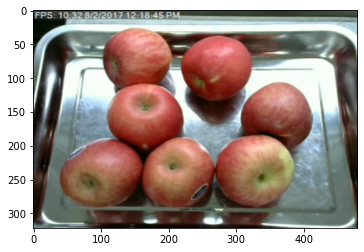

In [6]:
img_apple = cv2.imread(dataDirectory + apples + "Apple 1.png")

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

show(img_apple)

In [7]:
def createTrainingSet(categories, maxImages):
    
    X = []
    y = []
    
    for fruitCategory in categories:
        
        path = dataDirectory + categories.get(fruitCategory)
        
        for img in tqdm(os.listdir(path)[:maxImages]):
            
            try:
                
                img_array = cv2.imread(path + img)
                resized_array = cv2.resize(img_array, (sizeX, sizeY))
                X.append(resized_array)
                y.append(list(categories).index(fruitCategory))
                
            except:
                
                print("Could not find " + path + img)
    
    return X, y

In [8]:
B, a = createTrainingSet(categories, 600)

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 315.85it/s]


In [10]:
print(a)
print(B)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

1


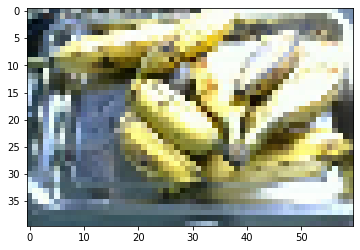

0


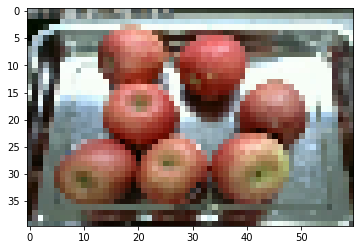

In [7]:
# print(trainingData[-1][1])
# show(trainingData[-1][0])

# print(trainingData[0][1])
# show(trainingData[0][0])


print(a[-1])
show(B[-1])

print(a[0])
show(B[0])

In [13]:
#y = tf.keras.utils.to_categorical(np.asarray(a))
X = np.array(B).reshape(-1, sizeX, sizeY, 3)


print(a)
print(y[:5])
print(X[0][0][:5])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

print(X_train[0][0][:5])

[[ 68  32  24]
 [ 68  32  24]
 [211 171 157]
 [242 210 190]
 [250 248 229]]


In [15]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#print(X_train, y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 38, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 19, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 19, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 17, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 8, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 8, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 6, 64)         1

In [16]:
print(X_train.shape)
print(y_train.shape)

(900, 60, 40, 3)
(900, 2)


In [17]:
history = model.fit(X_train, y_train, verbose=2, epochs=20)

Epoch 1/20
29/29 - 1s - loss: 16.6401 - accuracy: 0.5544
Epoch 2/20
29/29 - 1s - loss: 2.3857 - accuracy: 0.5800
Epoch 3/20
29/29 - 1s - loss: 1.2541 - accuracy: 0.6589
Epoch 4/20
29/29 - 1s - loss: 0.8434 - accuracy: 0.7244
Epoch 5/20
29/29 - 1s - loss: 0.5781 - accuracy: 0.7878
Epoch 6/20
29/29 - 1s - loss: 0.5165 - accuracy: 0.8200
Epoch 7/20
29/29 - 1s - loss: 0.3323 - accuracy: 0.8844
Epoch 8/20
29/29 - 1s - loss: 0.2432 - accuracy: 0.9156
Epoch 9/20
29/29 - 1s - loss: 0.1143 - accuracy: 0.9600
Epoch 10/20
29/29 - 1s - loss: 0.0487 - accuracy: 0.9811
Epoch 11/20
29/29 - 1s - loss: 0.0449 - accuracy: 0.9844
Epoch 12/20
29/29 - 1s - loss: 0.0284 - accuracy: 0.9900
Epoch 13/20
29/29 - 1s - loss: 0.0139 - accuracy: 0.9944
Epoch 14/20


KeyboardInterrupt: 

In [ ]:
# Saves all the models for future reference

version = 1
modelDir = "Model Versions (Keep all)/fruitModelV"

while True:
    try:
        f = open(modelDir + str(version) + ".h5", 'r')
        f.close()
        version = version + 1
    except:
        break
    
model.save(modelDir + str(version) + ".h5")


In [18]:
pred_hot = model.predict(X_test)

pred = np.argmax(pred_hot, axis=1)

y_compare = np.argmax(y_test, axis=1)

score = metrics.accuracy_score(y_compare, pred)

print("Accuracy score: {}".format(score))

#print(pred_hot[:5])
#print(pred)

Accuracy score: 0.9966666666666667


In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Fruit Model Accuracy')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
mat = confusion_matrix(pred, y_compare)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()